In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_mile = pd.read_csv(r'C:\Users\usee\Documents\TECHNOCOLABS\miles-driven.csv')
df_road = pd.read_csv(r'C:\Users\usee\Documents\TECHNOCOLABS\road-accidents.csv')
df_mile.head()


 





,state|million_miles_annually
0,Alabama|64914
1,Alaska|4593
2,Arizona|59575
3,Arkansas|32953
4,California|320784


In [2]:
df_road.head()

,state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time
0,Alabama|18.8|39|30|80
1,Alaska|18.1|41|25|94
2,Arizona|18.6|35|28|96
3,Arkansas|22.4|18|26|95
4,California|12|35|28|89


In [3]:
df_road.columns

Index(['state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time'], dtype='object')

In [4]:
# sorting df_mile

df_mile[['state','million_miles_anually']] = df_mile['state|million_miles_annually'].str.split('|', expand=True)

# dropping the original column
df_mile = df_mile.drop(columns=['state|million_miles_annually'])
df_mile.head()
df_mile.count()

state                    51
million_miles_anually    51
dtype: int64

In [5]:
# sorting df_road

df_road[['state', 'drvr_fatl_miles', 'perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']] = df_road['state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time'].str.split('|', expand=True)
df_road = df_road.drop(columns=['state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time'])
df_road.head()
df_road.count()

state                 51
drvr_fatl_miles       51
perc_fatl_speed       51
perc_fatl_alcohol     51
perc_fatl_1st_time    51
dtype: int64

In [6]:
df = pd.merge(df_mile, df_road, on=['state'])
df.head()

,state,million_miles_anually,drvr_fatl_miles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12,35,28,89


In [7]:
# changing the dtype from str to float64

# million_miles_anually
df['million_miles_anually'] = df['million_miles_anually'].astype('float64')
df['million_miles_anually'].dtype

# drvr_fatl_miles
df['drvr_fatl_miles'] = df['drvr_fatl_miles'].astype('float64')
df['drvr_fatl_miles'].dtype

# perc_fatl_speed
df['perc_fatl_speed'] = df['perc_fatl_speed'].astype('float64')
df['perc_fatl_speed'].dtype

# perc_fatl_alcohol
df['perc_fatl_alcohol'] = df['perc_fatl_alcohol'].astype('float64')
df['perc_fatl_alcohol'].dtype

# perc_fatl_1st_time
df['perc_fatl_1st_time'] = df['perc_fatl_1st_time'].astype('float64')
df['perc_fatl_1st_time'].dtype

dtype('float64')

In [8]:
# importing matplotlib

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


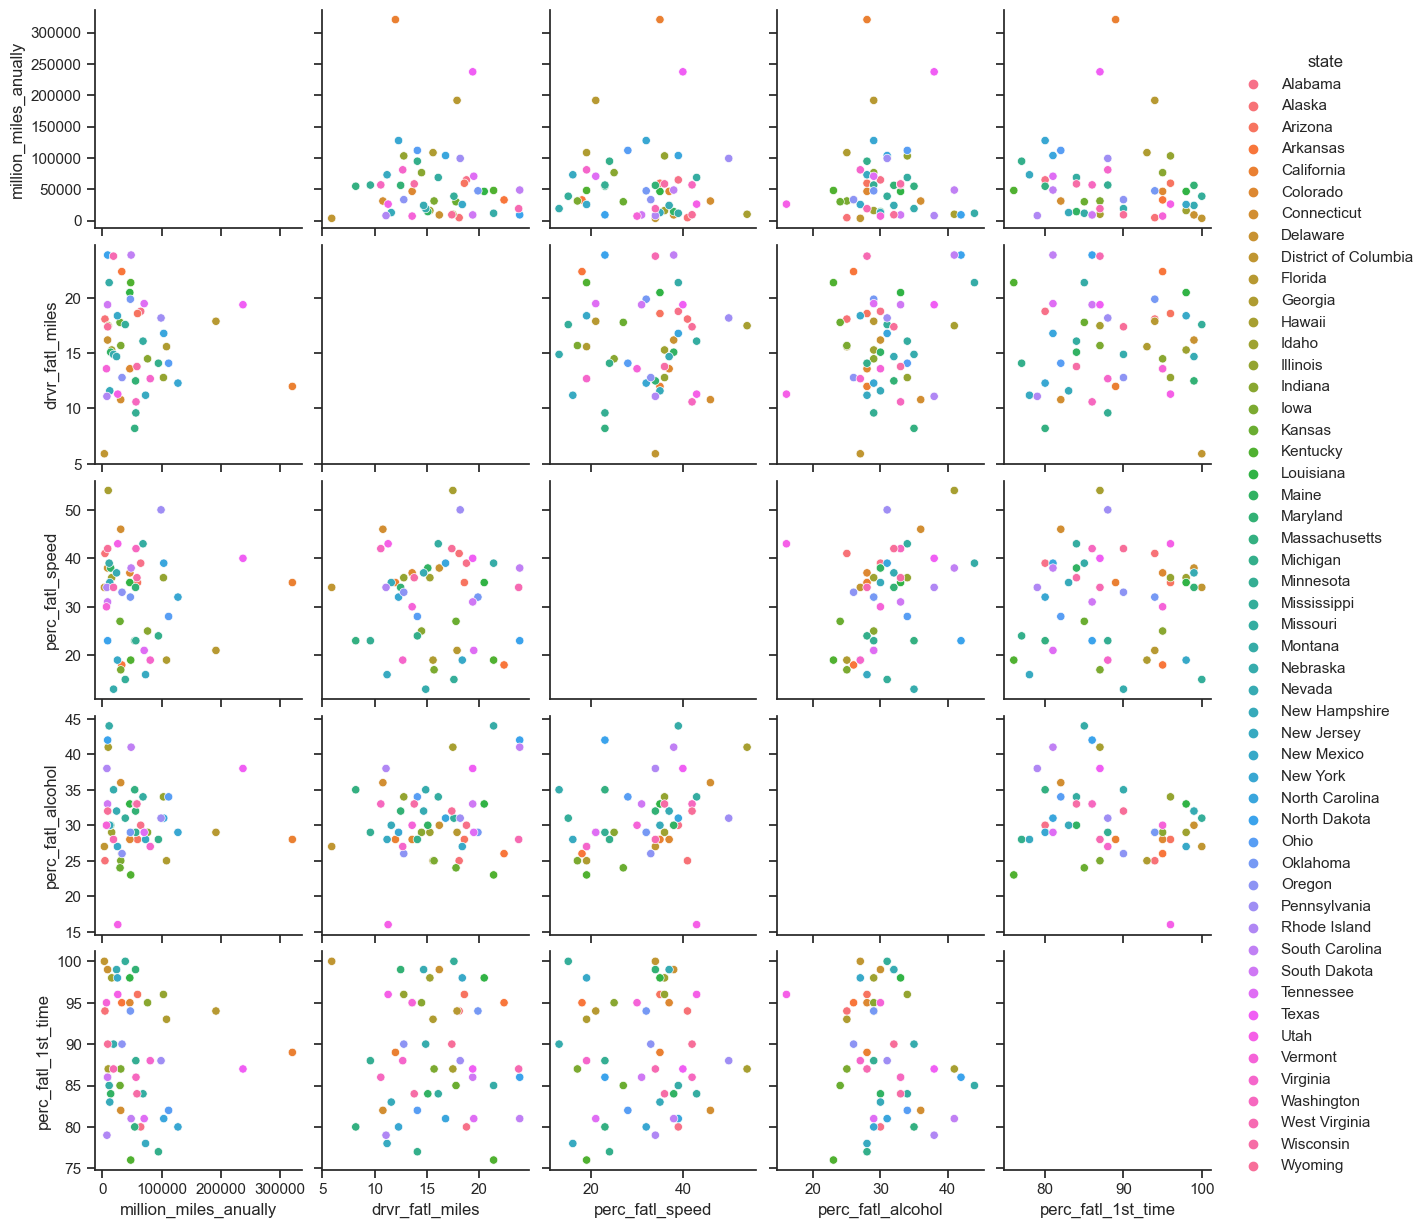

In [9]:
# scatterplot matrix

sns.set_theme(style="ticks")
sns.pairplot(df, hue='state')

In [10]:
corr_matrix = df.corr()
corr_matrix

C:\Users\usee\AppData\Local\Temp\ipykernel_8864\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,million_miles_anually,drvr_fatl_miles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
million_miles_anually,1.000000,-0.077133,-0.043199,-0.034561,-0.128928
drvr_fatl_miles,-0.077133,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.043199,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,-0.034561,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.128928,-0.017942,0.014066,-0.245455,1.000000


<Axes: title={'center': 'pearson correlation coffecient matrix'}>

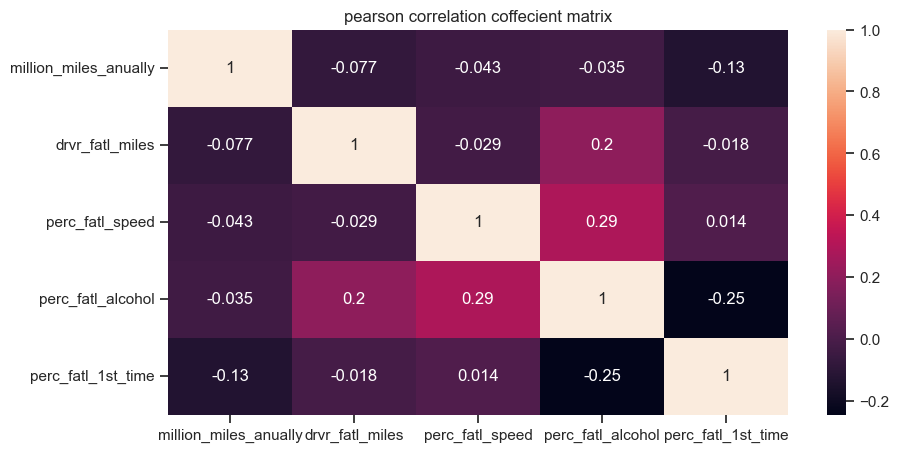

In [11]:
# visualizing the matrix

# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("pearson correlation coffecient matrix")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=corr_matrix, annot=True)

In [12]:
# multivariate regression

from sklearn import linear_model

# features
X = df[['perc_fatl_alcohol' ,'perc_fatl_speed', 'perc_fatl_1st_time']]

# target variable
y = df['drvr_fatl_miles']

regr = linear_model.LinearRegression()
regr.fit(X,y)

regr.coef_

array([ 0.19086404, -0.04180041,  0.02473301])

In [13]:
# PCA

from sklearn.preprocessing import StandardScaler

features = ['perc_fatl_alcohol', 'perc_fatl_speed', 'perc_fatl_1st_time']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['state']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


# assigning components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

In [14]:
# creating a new dataframe for pca1 and pca2
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pcaDf = pd.concat([principal_Df, df[['state']]], axis = 1)

pcaDf.head()

,principal component 1,principal component 2,state
0,0.884639,0.464211,Alabama
1,-0.625299,-1.220247,Alaska
2,-0.671696,-1.027863,Arizona
3,-1.839546,0.239910,Arkansas
4,-0.211743,-0.256667,California


In [15]:
# pca scatter plot 

import plotly.express as px

fig = px.scatter(principalComponents, x=0, y=1, color=df['state'], labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()

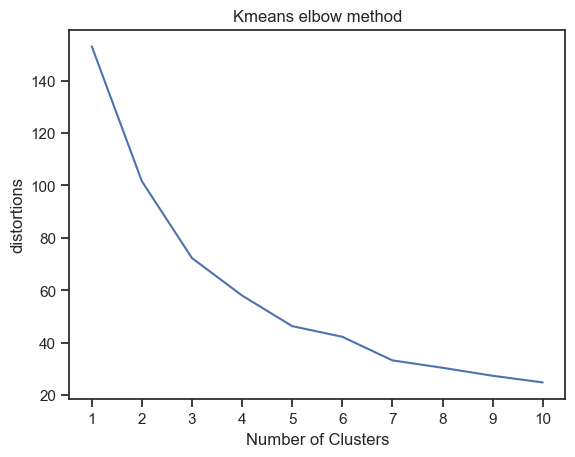

In [16]:
# kmeans elbow
from sklearn.cluster import KMeans

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold distortions values for each k
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), distortions)
plt.title("Kmeans elbow method")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("distortions")
plt.show()

In [17]:
# n=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

# plt.scatter(x, y, c=kmeans.labels_)
# plt.show()

fig = px.scatter(principalComponents, x=0, y=1, color=kmeans.labels_, labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()

C:\Users\usee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [18]:
df_mile.head()

,state,million_miles_anually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [19]:
# violin plot

fig = px.violin(df, y="million_miles_anually", x="state", color="state", box=True, points="all",
          hover_data=df_mile.columns)
fig.show()